In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sol_df = pd.read_csv('RawData/Testing/SOL_Pass_Rate.csv')
school_df = pd.read_excel("RawData/Testing/school-by-subject-2022.xlsx")

In [3]:
school_df

,Level,Div Num,Div Name,Sch Num,Sch Name,Sch Type,Low Grade,High Grade,Subject,Subgroup,2021-2022 Pass Rate
0,Sch,1,Accomack County,701,Accawmacke Elementary,Elem,PK,5,English: Reading,All Students,67
1,Sch,1,Accomack County,701,Accawmacke Elementary,Elem,PK,5,History and Social Sciences,All Students,72
2,Sch,1,Accomack County,701,Accawmacke Elementary,Elem,PK,5,Mathematics,All Students,66
3,Sch,1,Accomack County,701,Accawmacke Elementary,Elem,PK,5,Science,All Students,72
4,Sch,1,Accomack County,701,Accawmacke Elementary,Elem,PK,5,English: Reading,Asian,<
...,...,...,...,...,...,...,...,...,...,...,...
96964,Sch,98,York County,60,Yorktown Middle,Middle,06,8,Mathematics,White,81
96965,Sch,98,York County,60,Yorktown Middle,Middle,06,8,Remote Mathematics,White,NaN
96966,Sch,98,York County,60,Yorktown Middle,Middle,06,8,Science,White,70
96967,Sch,98,York County,60,Yorktown Middle,Middle,06,8,Remote English: Reading,White,NaN


In [4]:
sol_df

,SOL Pass Rate,School,Division,Sch_Type,Sch_Div
0,58.25,Galax Elementary,Galax City,Elem,Galax Elementary Galax City Public Schools
1,58.20,Galax High,Galax City,High,Galax High Galax City Public Schools
2,62.00,Galax Middle,Galax City,Middle,Galax Middle Galax City Public Schools
3,68.75,Elydale Middle,Lee County,Elem,Elydale Middle Lee County Public Schools
4,63.00,Thomas Walker High,Lee County,High,Thomas Walker High Lee County Public Schools
...,...,...,...,...,...
1706,79.20,Lois Hornsby Middle,Williamsburg-James City County,Middle,Lois Hornsby Middle Williamsburg-James City Co...
1707,79.25,Matoaka Elementary,Williamsburg-James City County,Elem,Matoaka Elementary Williamsburg-James City Cou...
1708,68.00,Norge Elementary,Williamsburg-James City County,Elem,Norge Elementary Williamsburg-James City Count...
1709,80.00,Stonehouse Elementary,Williamsburg-James City County,Elem,Stonehouse Elementary Williamsburg-James City ...


# Combine Into 1 DF

In [5]:
sol_divsions = sol_df.Sch_Div.to_list() ##Get list of all schools with SOL scores

def remove_schools_with_no_score(df): # Remove any entry that does not have a listed SOL score
    filtered_df = df[df['Sch_Div'].isin(sol_divsions)]
    filtered_df.reset_index(drop=True, inplace=True)
    return filtered_df


df = sol_df.copy()
df.drop(['School', 'Division'], axis = 1, inplace= True)
df

,SOL Pass Rate,Sch_Type,Sch_Div
0,58.25,Elem,Galax Elementary Galax City Public Schools
1,58.20,High,Galax High Galax City Public Schools
2,62.00,Middle,Galax Middle Galax City Public Schools
3,68.75,Elem,Elydale Middle Lee County Public Schools
4,63.00,High,Thomas Walker High Lee County Public Schools
...,...,...,...
1706,79.20,Middle,Lois Hornsby Middle Williamsburg-James City Co...
1707,79.25,Elem,Matoaka Elementary Williamsburg-James City Cou...
1708,68.00,Elem,Norge Elementary Williamsburg-James City Count...
1709,80.00,Elem,Stonehouse Elementary Williamsburg-James City ...


# Combining - Demographics

Economically Disadvantaged

In [6]:
econ_df = pd.read_csv('RawData/Demographics/Economically_Disadvantaged.csv')
econ_df = remove_schools_with_no_score(econ_df)
## Make total count column numeric and replace NA with 0
econ_df['Total Count'] = econ_df['Total Count'].str.replace(',', '')
econ_df['Total Count'] = pd.to_numeric(econ_df['Total Count'], errors= 'coerce')
econ_df['Total Count'] = econ_df['Total Count'].fillna(9999999)

In [7]:
results = {}
for div in sol_divsions:
    results[div] = econ_df[econ_df['Sch_Div'] == div]
print(len(results))
i = 0
r = 0
no_data_sch_div = [] #schools with no econ data
one_row_sch_div = [] #schools not having both Y and N for econ data
for division, data in results.items():
    if data.empty:
        no_data_sch_div.append(division)
        r+=1
        continue
    if len(data) <2 or data['Total Count'].sum() > 99999:
        i+= len(data) #add number of entries being removed by removing a school
        one_row_sch_div.append(division)

##Remove schools with only one Y/N from df, will add back later
filtered_econ_df = econ_df[~econ_df['Sch_Div'].isin(one_row_sch_div)]
print(econ_df.shape[0] - i == filtered_econ_df.shape[0])
print(i+r)
        

1711
True
37


In [8]:
perc_dis_df = pd.DataFrame(columns = ['Sch_Div', 'Perc_Disadv_Students']) #initialize df
filtered_results = {}
for div in sol_divsions:
    filtered_results[div] = filtered_econ_df[filtered_econ_df['Sch_Div'] == div]

i = 0
for division, data in filtered_results.items():
    if division in set(filtered_econ_df.Sch_Div.to_list()): #If data not missing, calc perc of students disadvantaged
        total_count = data['Total Count'].sum() #Get total number of students
        yes_count = data[data['Disadvantaged'] == 'Y']['Total Count'].sum()
        perc_yes = 100* round(yes_count / total_count, 4)
    else: # if missing, use value -999 to indicate missing
        perc_yes = -999 
    
    perc_dis_df.loc[i] = [division, perc_yes] # add row to df
    i+=1
perc_dis_df

,Sch_Div,Perc_Disadv_Students
0,Galax Elementary Galax City Public Schools,60.33
1,Galax High Galax City Public Schools,54.55
2,Galax Middle Galax City Public Schools,61.64
3,Elydale Middle Lee County Public Schools,65.71
4,Thomas Walker High Lee County Public Schools,59.17
...,...,...
1706,Lois Hornsby Middle Williamsburg-James City Co...,32.91
1707,Matoaka Elementary Williamsburg-James City Cou...,21.93
1708,Norge Elementary Williamsburg-James City Count...,45.62
1709,Stonehouse Elementary Williamsburg-James City ...,25.07


English Learners

In [9]:
eng_learners_df = pd.read_csv('RawData/Demographics/English_Learners.csv')
eng_learners_df = remove_schools_with_no_score(eng_learners_df) 
## Make total count column numeric and replace NA with 0
eng_learners_df['Total Count'] = eng_learners_df['Total Count'].str.replace(',', '')
eng_learners_df['Total Count'] = pd.to_numeric(eng_learners_df['Total Count'], errors= 'coerce')
eng_learners_df['Total Count'] = eng_learners_df['Total Count'].fillna(9999999)

In [10]:
eng_learners_df

,Division Name,School Name,English Learners,Total Count,Sch_Div
0,Accomack County,Accawmacke Elementary,N,284.0,Accawmacke Elementary Accomack County Public S...
1,Accomack County,Accawmacke Elementary,Y,102.0,Accawmacke Elementary Accomack County Public S...
2,Accomack County,Arcadia High,N,570.0,Arcadia High Accomack County Public Schools
3,Accomack County,Arcadia High,Y,92.0,Arcadia High Accomack County Public Schools
4,Accomack County,Chincoteague Elementary,N,224.0,Chincoteague Elementary Accomack County Public...
...,...,...,...,...,...
3259,York County,York River Academy,N,61.0,York River Academy York County Public Schools
3260,York County,Yorktown Elementary,N,597.0,Yorktown Elementary York County Public Schools
3261,York County,Yorktown Elementary,Y,13.0,Yorktown Elementary York County Public Schools
3262,York County,Yorktown Middle,N,622.0,Yorktown Middle York County Public Schools


In [11]:
results = {}
for div in sol_divsions:
    results[div] = eng_learners_df[eng_learners_df['Sch_Div'] == div]
print(len(results))
i = 0
r = 0
no_data_sch_div = [] #schools with no english data
one_row_sch_div = [] #schools not having both Y and N for english data
for division, data in results.items():
    if data.empty:
        no_data_sch_div.append(division)
        r+=1
        continue
    if len(data) !=2 or data['Total Count'].sum() > 99999:
        one_row_sch_div.append(division)
        i+= len(data) #add number of entries being removed by removing a school

##Remove schools with only one Y/N from df, will add back later
filtered_english_df = eng_learners_df[~eng_learners_df['Sch_Div'].isin(one_row_sch_div)]
print(eng_learners_df.shape[0] - i == filtered_english_df.shape[0])
print(i+r)

1711
True
969


In [12]:
perc_eng_df = pd.DataFrame(columns = ['Sch_Div', 'Perc_Engl_Learner']) #initialize df
filtered_results = {}
for div in sol_divsions:
    filtered_results[div] = filtered_english_df[filtered_english_df['Sch_Div'] == div]

i = 0
for division, data in filtered_results.items():
    if division in set(filtered_english_df.Sch_Div.to_list()): #If data not missing, calc perc of students english learners
        total_count = data['Total Count'].sum() #Get total number of students
        yes_count = data[data['English Learners'] == 'Y']['Total Count'].sum()
        perc_yes = 100* round(yes_count / total_count, 4)
    else: # if missing, use value -999 to indicate missing
        perc_yes = -999 
    
    perc_eng_df.loc[i] = [division, perc_yes] # add row to df
    i+=1
perc_eng_df

,Sch_Div,Perc_Engl_Learner
0,Galax Elementary Galax City Public Schools,17.70
1,Galax High Galax City Public Schools,11.24
2,Galax Middle Galax City Public Schools,14.63
3,Elydale Middle Lee County Public Schools,-999.00
4,Thomas Walker High Lee County Public Schools,-999.00
...,...,...
1706,Lois Hornsby Middle Williamsburg-James City Co...,2.75
1707,Matoaka Elementary Williamsburg-James City Cou...,4.76
1708,Norge Elementary Williamsburg-James City Count...,3.74
1709,Stonehouse Elementary Williamsburg-James City ...,1.58


Gender

In [13]:
gender_df = pd.read_csv('RawData/Demographics/Gender.csv')
gender_df = remove_schools_with_no_score(gender_df)
## Make total count column numeric and replace NA with 0
gender_df['Total Count'] = gender_df['Total Count'].str.replace(',', '')
gender_df['Total Count'] = pd.to_numeric(gender_df['Total Count'], errors= 'coerce')
gender_df['Total Count'] = gender_df['Total Count'].fillna(9999999)

In [14]:
gender_df

,Division Name,School Name,Gender,Total Count,Sch_Div
0,Accomack County,Accawmacke Elementary,Female,202,Accawmacke Elementary Accomack County Public S...
1,Accomack County,Accawmacke Elementary,Male,206,Accawmacke Elementary Accomack County Public S...
2,Accomack County,Arcadia High,Female,323,Arcadia High Accomack County Public Schools
3,Accomack County,Arcadia High,Male,364,Arcadia High Accomack County Public Schools
4,Accomack County,Chincoteague Elementary,Female,104,Chincoteague Elementary Accomack County Public...
...,...,...,...,...,...
3633,York County,York River Academy,Male,45,York River Academy York County Public Schools
3634,York County,Yorktown Elementary,Female,303,Yorktown Elementary York County Public Schools
3635,York County,Yorktown Elementary,Male,311,Yorktown Elementary York County Public Schools
3636,York County,Yorktown Middle,Female,299,Yorktown Middle York County Public Schools


In [15]:
results = {}
for div in sol_divsions:
    results[div] = gender_df[gender_df['Sch_Div'] == div]
print(len(results))
i = 0
r = 0
no_data_sch_div = [] #schools with no gender data
one_row_sch_div = [] #schools not having both M and F data
for division, data in results.items():
    if data.empty:
        no_data_sch_div.append(division)
        r+=1
        continue
    if len(data) ==1 or data['Total Count'].sum() > 99999:
        one_row_sch_div.append(division)
        i+= len(data) #add number of entries being removed by removing a school

##Remove schools with only one M/F from df, will add back later
filtered_gender_df = gender_df[~gender_df['Sch_Div'].isin(one_row_sch_div)]
print(gender_df.shape[0] - i == filtered_gender_df.shape[0])
print(i+r)

1711
True
15


In [16]:
perc_male_df = pd.DataFrame(columns = ['Sch_Div', 'Perc_Male']) #initialize df
filtered_results = {}
for div in sol_divsions:
    filtered_results[div] = filtered_gender_df[filtered_gender_df['Sch_Div'] == div]

i = 0
for division, data in filtered_results.items():
    if division in set(filtered_gender_df.Sch_Div.to_list()): #If data not missing, calc perc of male students
        total_count = data['Total Count'].sum() #Get total number of students
        male_count = data[data['Gender'] == 'Male']['Total Count'].sum()
        perc_male = 100 * round(male_count / total_count, 4)
    else: # if missing, use value -999 to indicate missing
        perc_male = -999 
    
    perc_male_df.loc[i] = [division, perc_male] # add row to df
    i+=1
perc_male_df

,Sch_Div,Perc_Male
0,Galax Elementary Galax City Public Schools,47.51
1,Galax High Galax City Public Schools,48.40
2,Galax Middle Galax City Public Schools,54.40
3,Elydale Middle Lee County Public Schools,56.43
4,Thomas Walker High Lee County Public Schools,50.87
...,...,...
1706,Lois Hornsby Middle Williamsburg-James City Co...,51.32
1707,Matoaka Elementary Williamsburg-James City Cou...,52.59
1708,Norge Elementary Williamsburg-James City Count...,53.30
1709,Stonehouse Elementary Williamsburg-James City ...,49.08


Military

In [17]:
military_df = pd.read_csv('RawData/Demographics/Military_Connected.csv')
military_df = remove_schools_with_no_score(military_df)
## Make total count column numeric and replace NA with 0
military_df['Total Count'] = military_df['Total Count'].str.replace(',', '')
military_df['Total Count'] = pd.to_numeric(military_df['Total Count'], errors= 'coerce')
military_df['Total Count'] = military_df['Total Count'].fillna(9999999)

In [18]:
military_df[military_df['Sch_Div'] == 'Open High Richmond City Public Schools']


,Division Name,School Name,Military,Total Count,Sch_Div
2455,Richmond City,Open High,N,188,Open High Richmond City Public Schools


In [19]:
military_df

,Division Name,School Name,Military,Total Count,Sch_Div
0,Accomack County,Accawmacke Elementary,N,407,Accawmacke Elementary Accomack County Public S...
1,Accomack County,Accawmacke Elementary,Y,1,Accawmacke Elementary Accomack County Public S...
2,Accomack County,Arcadia High,N,683,Arcadia High Accomack County Public Schools
3,Accomack County,Arcadia High,Y,4,Arcadia High Accomack County Public Schools
4,Accomack County,Chincoteague Elementary,N,200,Chincoteague Elementary Accomack County Public...
...,...,...,...,...,...
3242,York County,York River Academy,Y,18,York River Academy York County Public Schools
3243,York County,Yorktown Elementary,N,490,Yorktown Elementary York County Public Schools
3244,York County,Yorktown Elementary,Y,124,Yorktown Elementary York County Public Schools
3245,York County,Yorktown Middle,N,507,Yorktown Middle York County Public Schools


In [20]:
results = {}
for div in sol_divsions:
    results[div] = military_df[military_df['Sch_Div'] == div]
print(len(results))
i = 0
r = 0
no_data_sch_div = [] #schools with no military data
one_row_sch_div = [] #schools not having both Y and N data
for division, data in results.items():
    if data.empty:
        no_data_sch_div.append(division)
        r+=1
        continue
    if len(data) ==1 or data['Total Count'].sum() > 99999:
        one_row_sch_div.append(division)
        i+= len(data) #add number of entries being removed by removing a school

##Remove schools with only one Y/N from df, will add back later
filtered_military_df = military_df[~military_df['Sch_Div'].isin(one_row_sch_div)]
print(military_df.shape[0] - i == filtered_military_df.shape[0])
print(i+r)

1711
True
160


In [21]:
perc_mil_connect_df = pd.DataFrame(columns = ['Sch_Div', 'Perc_Military_Connection']) #initialize df
filtered_results = {}
for div in sol_divsions:
    filtered_results[div] = filtered_military_df[filtered_military_df['Sch_Div'] == div]

i = 0
for division, data in filtered_results.items():
    if division in set(filtered_military_df.Sch_Div.to_list()): #If data not missing, calc perc of military students
        total_count = data['Total Count'].sum() #Get total number of students
        yes_count = data[data['Military'] == 'Y']['Total Count'].sum()
        perc_yes = 100 * round(yes_count / total_count, 4)
    else: # if missing, use value -999 to indicate missing
        perc_yes = -999 
    
    perc_mil_connect_df.loc[i] = [division, perc_yes] # add row to df
    i+=1
perc_mil_connect_df

,Sch_Div,Perc_Military_Connection
0,Galax Elementary Galax City Public Schools,0.60
1,Galax High Galax City Public Schools,0.80
2,Galax Middle Galax City Public Schools,-999.00
3,Elydale Middle Lee County Public Schools,-999.00
4,Thomas Walker High Lee County Public Schools,-999.00
...,...,...
1706,Lois Hornsby Middle Williamsburg-James City Co...,13.62
1707,Matoaka Elementary Williamsburg-James City Cou...,17.33
1708,Norge Elementary Williamsburg-James City Count...,12.60
1709,Stonehouse Elementary Williamsburg-James City ...,16.62


Disabilities

In [22]:
disability_df = pd.read_csv('RawData/Demographics/Students_with_Disabilities.csv')
disability_df = remove_schools_with_no_score(disability_df)
## Make total count column numeric and replace NA with 0
disability_df['Total Count'] = disability_df['Total Count'].str.replace(',', '')
disability_df['Total Count'] = pd.to_numeric(disability_df['Total Count'], errors= 'coerce')
print(disability_df['Total Count'].isna().sum())
disability_df['Total Count'] = disability_df['Total Count'].fillna(9999999)

7


In [23]:
disability_df

,Division Name,School Name,Disabled,Total Count,Sch_Div
0,Accomack County,Accawmacke Elementary,N,366.0,Accawmacke Elementary Accomack County Public S...
1,Accomack County,Accawmacke Elementary,Y,42.0,Accawmacke Elementary Accomack County Public S...
2,Accomack County,Arcadia High,N,598.0,Arcadia High Accomack County Public Schools
3,Accomack County,Arcadia High,Y,89.0,Arcadia High Accomack County Public Schools
4,Accomack County,Chincoteague Elementary,N,197.0,Chincoteague Elementary Accomack County Public...
...,...,...,...,...,...
3381,York County,York River Academy,Y,26.0,York River Academy York County Public Schools
3382,York County,Yorktown Elementary,N,539.0,Yorktown Elementary York County Public Schools
3383,York County,Yorktown Elementary,Y,75.0,Yorktown Elementary York County Public Schools
3384,York County,Yorktown Middle,N,564.0,Yorktown Middle York County Public Schools


In [24]:
len(set(disability_df.Sch_Div.to_list()))

1696

In [25]:
results = {}
for div in sol_divsions:
    results[div] = disability_df[disability_df['Sch_Div'] == div]
print(len(results))
i = 0 #keep track of number of entries that are being removed
r = 0
no_data_sch_div = [] #schools with no disability data
one_row_sch_div = [] #schools not having both Y and N data
for division, data in results.items():
    if data.empty:
        no_data_sch_div.append(division)
        r+=1
        continue
    if len(data) !=2 or data['Total Count'].sum() > 99999:
        one_row_sch_div.append(division)
        i+= len(data) #add number of entries being removed by removing a school

##Remove schools with only one Y/N from df, will add back later
filtered_disability_df = disability_df[~disability_df['Sch_Div'].isin(one_row_sch_div)]
print(disability_df.shape[0] - i == filtered_disability_df.shape[0])
print(i+r)

1711
True
35


In [26]:
perc_disability_df = pd.DataFrame(columns = ['Sch_Div', 'Perc_disability']) #initialize df
filtered_results = {}
for div in sol_divsions:
    filtered_results[div] = filtered_disability_df[filtered_disability_df['Sch_Div'] == div]

i = 0
for division, data in filtered_results.items():
    if division in set(filtered_disability_df.Sch_Div.to_list()): #If data not missing, calc perc of disabledZ students
        total_count = data['Total Count'].sum() #Get total number of students
        yes_count = data[data['Disabled'] == 'Y']['Total Count'].sum()
        perc_yes = 100 * round(yes_count / total_count, 4)
    else: # if missing, use value -999 to indicate missing
        perc_yes = -999 
    
    perc_disability_df.loc[i] = [division, perc_yes] # add row to df
    i+=1
perc_disability_df

,Sch_Div,Perc_disability
0,Galax Elementary Galax City Public Schools,12.97
1,Galax High Galax City Public Schools,13.64
2,Galax Middle Galax City Public Schools,14.15
3,Elydale Middle Lee County Public Schools,17.14
4,Thomas Walker High Lee County Public Schools,21.45
...,...,...
1706,Lois Hornsby Middle Williamsburg-James City Co...,16.27
1707,Matoaka Elementary Williamsburg-James City Cou...,12.74
1708,Norge Elementary Williamsburg-James City Count...,20.12
1709,Stonehouse Elementary Williamsburg-James City ...,16.23


Race

In [27]:
race_df = pd.read_csv('RawData/Demographics/Race.csv')
race_df = remove_schools_with_no_score(race_df)
race_df.drop(['Division Name', 'School Name', 'Total Count'], axis = 1, inplace = True)
## Make total count column numeric and replace NA with 0
print(race_df['Race_Percent'].isna().sum())
race_df['Race_Percent'] = race_df['Race_Percent'].fillna(9999999)
len(set(race_df.Sch_Div.to_list()))

8


1690

In [28]:
##DF already has percentages, just need to add NA for divisions that have no race data
##Also need to plug in 0% for schools that dont have all 7 races listed
no_data_sch_div = [div for div in sol_divsions if div not in set(race_df.Sch_Div.to_list())] #list of schools with no data at all
races = race_df.Race.value_counts().keys().to_list()


complete_data = []
for div in sol_divsions:
    for race in races:
        ########Add any missing race rows with 0% ########
        if div not in no_data_sch_div:
            data = race_df[race_df['Sch_Div'] == div]
            existing_row = race_df[(race_df['Sch_Div'] == div) & (race_df['Race'] == race)]
            if not existing_row.empty: #if there exists data for a given race
                complete_data.append(existing_row.iloc[0].to_dict()) #add to list
                num_na = existing_row.iloc[0].isna().sum()
                if num_na > 0:
                    print(existing_row.iloc[0])
            else: #if no race data
                complete_data.append({'Sch_Div': div, 'Race': race, 'Race_Percent': 0})
        ####### if no race data at all###########
        else:   
            complete_data.append({'Sch_Div': div, 'Race': race, 'Race_Percent': -999})

complete_df = pd.DataFrame(complete_data)
complete_df['Race_Percent'] = round(complete_df['Race_Percent'], 2)
complete_df

,Race,Race_Percent,Sch_Div
0,"White, not of Hispanic origin",57.92,Galax Elementary Galax City Public Schools
1,"Non-Hispanic, two or more races",5.43,Galax Elementary Galax City Public Schools
2,Hispanic,32.13,Galax Elementary Galax City Public Schools
3,"Black, not of Hispanic origin",3.62,Galax Elementary Galax City Public Schools
4,Asian,0.60,Galax Elementary Galax City Public Schools
...,...,...,...
11972,Hispanic,11.69,Warhill High Williamsburg-James City County Pu...
11973,"Black, not of Hispanic origin",17.92,Warhill High Williamsburg-James City County Pu...
11974,Asian,1.95,Warhill High Williamsburg-James City County Pu...
11975,American Indian or Alaska Native,0.60,Warhill High Williamsburg-James City County Pu...


In [29]:
###Now need to convert to df with only 1 row per Sch_div --> 7 additional columns, one for each race percentage
perc_race_df = complete_df.pivot(index='Sch_Div', columns='Race', values='Race_Percent').reset_index()
perc_race_df

Race,Sch_Div,American Indian or Alaska Native,Asian,"Black, not of Hispanic origin",Hispanic,Native Hawaiian or Pacific Islander,"Non-Hispanic, two or more races","White, not of Hispanic origin"
0,A. Henderson Elementary Prince William County ...,0.13,11.42,20.69,22.97,0.76,10.53,33.50
1,A.G. Richardson Elementary Culpeper County Pub...,0.37,0.37,11.81,14.58,0.00,9.04,63.84
2,A.M. Davis Elementary Chesterfield County Publ...,0.14,4.21,35.25,34.27,0.28,5.90,19.94
3,A.S. Rhodes Elementary Warren County Public Sc...,0.00,0.75,2.99,8.96,0.00,9.70,77.61
4,A.W.E. Bassette Elementary Hampton City Public...,0.00,1.72,76.77,4.95,0.00,10.32,6.24
...,...,...,...,...,...,...,...,...
1706,Yorktown Elementary York County Public Schools,0.33,2.77,21.82,12.70,0.16,13.19,49.02
1707,Yorktown High Arlington County Public Schools,0.16,6.47,5.13,15.87,0.04,8.01,64.31
1708,Yorktown Middle York County Public Schools,0.94,2.34,15.76,11.86,0.62,8.27,60.22
1709,Yowell Elementary Culpeper County Public Schools,0.46,1.54,14.44,29.34,0.15,7.37,46.70


In [30]:
perc_race_df.isna().sum()

Race
Sch_Div                                 0
American Indian or Alaska Native        0
Asian                                   0
Black, not of Hispanic origin           0
Hispanic                                0
Native Hawaiian  or Pacific Islander    0
Non-Hispanic, two or more races         0
White, not of Hispanic origin           0
dtype: int64

# Combining - Economic Factors

Free and Reduced Lunches

In [31]:
## Already has percent eligable --> just need to clean data set
lunch_df = pd.read_csv('RawData/Economic Factors/Free_and_Reduced_Lunch.csv')
lunch_df = remove_schools_with_no_score(lunch_df)
print(lunch_df['Percent Eligible'].isna().sum()) # 0 NA

0


In [32]:
##Add in missing schools with NA
perc_lunch_df = lunch_df.drop(['School', 'Division'], axis = 1)
no_data_sch_div = [div for div in sol_divsions if div not in set(perc_lunch_df.Sch_Div.to_list())]  #List of schools with no lunch data
for div in no_data_sch_div:
    perc_lunch_df.loc[perc_lunch_df.shape[0]] = [-999, div] #if no data, fill with -999

perc_lunch_df.rename(columns = {'Percent Eligible':'Perc_Free_Reduced_Lunch_Eligible'}, inplace = True)
perc_lunch_df


,Perc_Free_Reduced_Lunch_Eligible,Sch_Div
0,66.3,Galax Elementary Galax City Public Schools
1,63.2,Galax High Galax City Public Schools
2,62.0,Galax Middle Galax City Public Schools
3,94.3,Elydale Middle Lee County Public Schools
4,94.5,Jonesville Middle Lee County Public Schools
...,...,...
1706,-999.0,Garrisonville Elementary Stafford County Publi...
1707,-999.0,Arlington Science Focus School Arlington Count...
1708,-999.0,Jordan Springs Elementary Frederick County Pub...
1709,-999.0,Potomac Shores Middle Prince William County Pu...


Funding

In [33]:
##Data already in acceptable format, just need to add missing schools
funding_df = pd.read_csv('RawData/Economic Factors/Funding.csv')
funding_df = remove_schools_with_no_score(funding_df)
print(funding_df.isna().sum()) # no NaNs

School                                           0
Division                                         0
End_of_Year_Average_Daily_Membership             0
School_Level_Expenditures_Per_Pupil_Federal      0
School_Level_Expenditures_Per_Pupil_State        0
Division_Level_Expenditures_Per_Pupil_Federal    0
Division_Level_Expenditures_Per_Pupil_State      0
Total_Per_Pupil_Expenditures                     0
Total_Expenditures                               0
Sch_Div                                          0
dtype: int64


In [34]:
perc_funding_df = funding_df.drop(['School', 'Division'], axis = 1)
no_data_sch_div = [div for div in sol_divsions if div not in set(perc_funding_df.Sch_Div.to_list())]  #List of schools with no lunch data
for div in no_data_sch_div:
    perc_funding_df.loc[perc_funding_df.shape[0]] = [-999, -999,-999,-999,-999,-999,-999,div] #if no data, fill with -999

perc_funding_df

,End_of_Year_Average_Daily_Membership,School_Level_Expenditures_Per_Pupil_Federal,School_Level_Expenditures_Per_Pupil_State,Division_Level_Expenditures_Per_Pupil_Federal,Division_Level_Expenditures_Per_Pupil_State,Total_Per_Pupil_Expenditures,Total_Expenditures,Sch_Div
0,673.77,1391,6228,1991,3758,13368,9007096,Galax Elementary Galax City Public Schools
1,364.22,582,11040,1991,3758,17370,6326623,Galax High Galax City Public Schools
2,311.97,526,7163,1991,3758,13438,4192233,Galax Middle Galax City Public Schools
3,141.91,2801,9416,951,2773,15941,2262190,Elydale Middle Lee County Public Schools
4,236.96,2036,9694,951,2773,15454,3662085,Jonesville Middle Lee County Public Schools
...,...,...,...,...,...,...,...,...
1706,507.08,558,9534,559,4980,15631,7925938,Clara Byrd Baker Elementary Williamsburg-James...
1707,458.64,899,9535,559,4980,15972,7325442,Laurel Lane Elementary Williamsburg-James City...
1708,500.28,815,8406,559,4980,14760,7384080,D.J. Montague Elementary Williamsburg-James Ci...
1709,505.06,566,9332,559,4980,15436,7796098,J. Blaine Blayton Elementary Williamsburg-Jame...


# Combining - Student Behaviors

Absenteeism

In [35]:
##Absentee rate lready included, just need to drop columns
absent_df = pd.read_csv('RawData/Student Behaviors/Absenteeism.csv')
absent_df = remove_schools_with_no_score(absent_df)
print(absent_df.isna().sum())
perc_absent_df = absent_df.drop(['Division', 'School', 
                                 'Number_of_Students_Missing_10__or_More_of_the_Days_Enrolled', 
                                 'Number_of_Students_Enrolled_for_Half_the_Year_or_More'], 
                                 axis = 1)

School                                                         0
Division                                                       0
Number_of_Students_Missing_10__or_More_of_the_Days_Enrolled    0
Number_of_Students_Enrolled_for_Half_the_Year_or_More          0
Chronic_Absenteeism_Rate                                       0
Sch_Div                                                        0
dtype: int64


In [36]:
perc_absent_df

,Chronic_Absenteeism_Rate,Sch_Div
0,15.89,Galax Elementary Galax City Public Schools
1,23.42,Galax High Galax City Public Schools
2,13.74,Galax Middle Galax City Public Schools
3,13.99,Elydale Middle Lee County Public Schools
4,24.17,Jonesville Middle Lee County Public Schools
...,...,...
1706,9.49,James River Elementary Williamsburg-James City...
1707,10.34,Clara Byrd Baker Elementary Williamsburg-James...
1708,15.33,Laurel Lane Elementary Williamsburg-James City...
1709,11.98,D.J. Montague Elementary Williamsburg-James Ci...


Dropout

In [37]:
dropout_df = pd.read_csv('RawData/Student Behaviors/Dropout.csv')
dropout_df = remove_schools_with_no_score(dropout_df)
print(dropout_df.isna().sum())
dropout_df['Students_in_the_Cohort'] = dropout_df['Students_in_the_Cohort'].fillna(9999999)
dropout_df['Cohort_Dropout_Rate'] = dropout_df['Cohort_Dropout_Rate'].fillna(9999999)
dropout_df['Dropouts'] = dropout_df['Dropouts'].fillna(9999999)

School                    0
Division                  0
Dropouts                  5
Students_in_the_Cohort    5
Cohort_Dropout_Rate       1
Sch_Div                   0
dtype: int64


In [38]:
dropout_df

,School,Division,Dropouts,Students_in_the_Cohort,Cohort_Dropout_Rate,Sch_Div
0,Galax High,Galax City Public Schools,6.0,83.0,7.23,Galax High Galax City Public Schools
1,Lee High,Lee County Public Schools,23.0,181.0,12.71,Lee High Lee County Public Schools
2,Thomas Walker High,Lee County Public Schools,2.0,50.0,4.00,Thomas Walker High Lee County Public Schools
3,Salem High,Salem City Public Schools,14.0,315.0,4.44,Salem High Salem City Public Schools
4,West Point Middle/High,West Point Public Schools,1.0,77.0,1.30,West Point Middle/High West Point Public Schools
...,...,...,...,...,...,...
309,Unity Reed High,Prince William County Public Schools,81.0,633.0,12.80,Unity Reed High Prince William County Public S...
310,Woodbridge High,Prince William County Public Schools,51.0,749.0,6.81,Woodbridge High Prince William County Public S...
311,Lafayette High,Williamsburg-James City County Public Schools,10.0,301.0,3.32,Lafayette High Williamsburg-James City County ...
312,Warhill High,Williamsburg-James City County Public Schools,6.0,352.0,1.70,Warhill High Williamsburg-James City County Pu...


In [39]:
results = {}
for div in sol_divsions:
    results[div] = dropout_df[dropout_df['Sch_Div'] == div]
print(len(results))
i = 0 #keep track of number of entries that are being removed
no_data_sch_div = [div for div in sol_divsions if div not in set(dropout_df.Sch_Div.to_list())] #list of schools with no data at all
one_row_sch_div = [] #schools in df with no absent data
for division, data in results.items():
    if data['Cohort_Dropout_Rate'].sum() > 99999 or data['Dropouts'].sum() > 99999:
        one_row_sch_div.append(division)
        i+= len(data) #add number of entries being removed by removing a school

##Remove schools with only one Y/N from df, will add back later
filtered_dropout_df = dropout_df[~dropout_df['Sch_Div'].isin(one_row_sch_div)]
print(dropout_df.shape[0] - i == filtered_dropout_df.shape[0])
print(i)

1711
True
5


In [40]:
perc_dropout_df = pd.DataFrame(columns = ['Sch_Div', 'Perc_Dropout']) #initialize df
filtered_results = {}
for div in sol_divsions:
    filtered_results[div] = filtered_dropout_df[filtered_dropout_df['Sch_Div'] == div]

i = 0
for division, data in filtered_results.items():
    if division in set(filtered_dropout_df.Sch_Div.to_list()): #If data not missing, extract dropout rate
        dropout_rate = data['Cohort_Dropout_Rate'].sum()
    else: # if missing, use value -999 to indicate missing
        dropout_rate = -999 
    
    perc_dropout_df.loc[i] = [division, dropout_rate] # add row to df
    i+=1
perc_dropout_df

,Sch_Div,Perc_Dropout
0,Galax Elementary Galax City Public Schools,-999.00
1,Galax High Galax City Public Schools,7.23
2,Galax Middle Galax City Public Schools,-999.00
3,Elydale Middle Lee County Public Schools,-999.00
4,Thomas Walker High Lee County Public Schools,4.00
...,...,...
1706,Lois Hornsby Middle Williamsburg-James City Co...,-999.00
1707,Matoaka Elementary Williamsburg-James City Cou...,-999.00
1708,Norge Elementary Williamsburg-James City Count...,-999.00
1709,Stonehouse Elementary Williamsburg-James City ...,-999.00


Graduation

In [41]:
##Only care about grad completion index
grad_df = pd.read_csv('RawData/Student Behaviors/Graduation.csv')
grad_df = remove_schools_with_no_score(grad_df)
print(grad_df.isna().sum())
grad_df = grad_df.fillna(9999999)

School                         0
Division                       0
Diplomas                       5
GEDs                           5
Certificates_of_Completion     5
Still_Enrolled                 5
Graduation_Completion_Index    2
Sch_Div                        0
dtype: int64


In [42]:
grad_df

,School,Division,Diplomas,GEDs,Certificates_of_Completion,Still_Enrolled,Graduation_Completion_Index,Sch_Div
0,Galax High,Galax City Public Schools,73.0,2.0,0.0,2.0,91.4,Galax High Galax City Public Schools
1,Lee High,Lee County Public Schools,158.0,1.0,0.0,2.0,84.3,Lee High Lee County Public Schools
2,Thomas Walker High,Lee County Public Schools,47.0,2.0,0.0,0.0,89.8,Thomas Walker High Lee County Public Schools
3,Salem High,Salem City Public Schools,298.0,1.0,0.0,3.0,94.9,Salem High Salem City Public Schools
4,West Point Middle/High,West Point Public Schools,71.0,2.0,0.0,3.0,96.9,West Point Middle/High West Point Public Schools
...,...,...,...,...,...,...,...,...
309,Unity Reed High,Prince William County Public Schools,532.0,0.0,0.0,33.0,84.6,Unity Reed High Prince William County Public S...
310,Woodbridge High,Prince William County Public Schools,689.0,5.0,0.0,11.0,91.9,Woodbridge High Prince William County Public S...
311,Lafayette High,Williamsburg-James City County Public Schools,284.0,6.0,0.0,2.0,95.4,Lafayette High Williamsburg-James City County ...
312,Warhill High,Williamsburg-James City County Public Schools,333.0,15.0,0.0,2.0,97.1,Warhill High Williamsburg-James City County Pu...


In [43]:
results = {}
for div in sol_divsions:
    results[div] = grad_df[grad_df['Sch_Div'] == div]
print(len(results))
i = 0 #keep track of number of entries that are being removed
no_data_sch_div = [div for div in sol_divsions if div not in set(grad_df.Sch_Div.to_list())] #list of schools with no data at all
one_row_sch_div = [] #schools in df with no grad data
for division, data in results.items():
    if data['GEDs'].sum() > 99999:
        one_row_sch_div.append(division)
        i+= len(data) #add number of entries being removed by removing a school

##Remove schools with only one Y/N from df, will add back later
filtered_grad_df = grad_df[~grad_df['Sch_Div'].isin(one_row_sch_div)]
print(grad_df.shape[0] - i == filtered_grad_df.shape[0])
print(i)

1711
True
5


In [44]:
perc_grad_df = pd.DataFrame(columns = ['Sch_Div', 'Grad_Completion_Index']) #initialize df
filtered_results = {}
for div in sol_divsions:
    filtered_results[div] = filtered_grad_df[filtered_grad_df['Sch_Div'] == div]

i = 0
for division, data in filtered_results.items():
    if division in set(filtered_grad_df.Sch_Div.to_list()): #If data not missing, extract grad index
        grad_index = data['Graduation_Completion_Index'].sum()
    else: # if missing, use value -999 to indicate missing
        grad_index = -999 
    
    perc_grad_df.loc[i] = [division, grad_index] # add row to df
    i+=1
perc_grad_df

,Sch_Div,Grad_Completion_Index
0,Galax Elementary Galax City Public Schools,-999.0
1,Galax High Galax City Public Schools,91.4
2,Galax Middle Galax City Public Schools,-999.0
3,Elydale Middle Lee County Public Schools,-999.0
4,Thomas Walker High Lee County Public Schools,89.8
...,...,...
1706,Lois Hornsby Middle Williamsburg-James City Co...,-999.0
1707,Matoaka Elementary Williamsburg-James City Cou...,-999.0
1708,Norge Elementary Williamsburg-James City Count...,-999.0
1709,Stonehouse Elementary Williamsburg-James City ...,-999.0


# Combining - Teachers

In [45]:
teach_edu_df = pd.read_csv('RawData/Teachers/Education_Level.csv')
teach_edu_df = remove_schools_with_no_score(teach_edu_df)
teach_edu_df.drop(['Division', 'School'], axis = 1, inplace = True)
## Make total count column numeric and replace NA with 0
print(teach_edu_df['Degree_Percent'].isna().sum())
len(set(teach_edu_df.Sch_Div.to_list()))

0


1706

In [46]:
teach_edu_df

,Degree_Percent,Degree_Type,Sch_Div
0,50,Bachelor's Degree,Galax Elementary Galax City Public Schools
1,45,Master's Degree,Galax Elementary Galax City Public Schools
2,2,Doctoral Degree,Galax Elementary Galax City Public Schools
3,38,Bachelor's Degree,Galax High Galax City Public Schools
4,55,Master's Degree,Galax High Galax City Public Schools
...,...,...,...
5113,58,Master's Degree,D.J. Montague Elementary Williamsburg-James Ci...
5114,0,Doctoral Degree,D.J. Montague Elementary Williamsburg-James Ci...
5115,44,Bachelor's Degree,J. Blaine Blayton Elementary Williamsburg-Jame...
5116,54,Master's Degree,J. Blaine Blayton Elementary Williamsburg-Jame...


In [47]:
##DF already has percentages, just need to add NA for divisions that have no teacher education data
no_data_sch_div = [div for div in sol_divsions if div not in set(teach_edu_df.Sch_Div.to_list())] #list of schools with no data at all
diplomas = teach_edu_df.Degree_Type.value_counts().keys().to_list()


complete_data = []
for div in sol_divsions:
    for diploma in diplomas:
        ########Add existing data ########
        if div not in no_data_sch_div:
            data = teach_edu_df[teach_edu_df['Sch_Div'] == div]
            existing_row = teach_edu_df[(teach_edu_df['Sch_Div'] == div) & (teach_edu_df['Degree_Type'] == diploma)]
            complete_data.append(existing_row.iloc[0].to_dict()) #add to list
        ####### if no diploma data at all###########
        else:   
            complete_data.append({'Sch_Div': div, 'Degree_Type': diploma, 'Degree_Percent': -999})

complete_df = pd.DataFrame(complete_data)
complete_df

,Degree_Percent,Degree_Type,Sch_Div
0,50,Bachelor's Degree,Galax Elementary Galax City Public Schools
1,45,Master's Degree,Galax Elementary Galax City Public Schools
2,2,Doctoral Degree,Galax Elementary Galax City Public Schools
3,38,Bachelor's Degree,Galax High Galax City Public Schools
4,55,Master's Degree,Galax High Galax City Public Schools
...,...,...,...
5128,69,Master's Degree,Stonehouse Elementary Williamsburg-James City ...
5129,0,Doctoral Degree,Stonehouse Elementary Williamsburg-James City ...
5130,28,Bachelor's Degree,Warhill High Williamsburg-James City County Pu...
5131,64,Master's Degree,Warhill High Williamsburg-James City County Pu...


In [48]:
###Now need to convert to df with only 1 row per Sch_div --> 3 additional columns, 1 for each degree type
perc_teacher_edu_df = complete_df.pivot(index='Sch_Div', columns='Degree_Type', values='Degree_Percent').reset_index()
perc_teacher_edu_df

Degree_Type,Sch_Div,Bachelor's Degree,Doctoral Degree,Master's Degree
0,A. Henderson Elementary Prince William County ...,35,2,62
1,A.G. Richardson Elementary Culpeper County Pub...,44,0,56
2,A.M. Davis Elementary Chesterfield County Publ...,31,0,69
3,A.S. Rhodes Elementary Warren County Public Sc...,52,0,44
4,A.W.E. Bassette Elementary Hampton City Public...,58,3,32
...,...,...,...,...
1706,Yorktown Elementary York County Public Schools,47,0,51
1707,Yorktown High Arlington County Public Schools,22,1,75
1708,Yorktown Middle York County Public Schools,30,2,65
1709,Yowell Elementary Culpeper County Public Schools,53,0,45


In [49]:
r = 0
for i in range(perc_teacher_edu_df.shape[0]):
    data = perc_teacher_edu_df.iloc[i]
    total = (data["Bachelor's Degree"] + data["Doctoral Degree"] + data["Master's Degree"])
    if total> 102 or total < 98:
        print(total)
        r+=1
print('Number of entries beyond 100 +/- 2: ', r)

96
93
93
90
95
97
95
97
95
84
97
87
96
92
93
96
94
94
97
97
94
90
89
97
92
92
96
95
96
90
96
97
96
94
96
96
88
96
-2997
97
96
95
90
92
97
95
97
92
94
95
96
97
95
97
94
95
95
95
97
85
94
97
97
96
89
92
95
97
87
94
91
86
96
94
94
97
95
96
94
97
95
94
92
96
96
97
96
94
95
95
97
95
96
96
88
97
95
97
95
96
93
90
-2997
90
93
95
91
93
93
93
97
97
83
97
95
93
97
95
97
95
87
91
94
97
96
95
97
95
91
94
96
96
95
96
93
96
93
79
95
97
96
93
97
91
96
95
89
96
93
97
87
96
93
95
83
94
94
83
93
96
96
96
93
97
89
88
97
95
82
87
91
95
85
94
97
96
97
97
94
97
89
91
96
97
94
96
94
97
87
93
95
89
-2997
97
90
95
96
89
95
91
88
96
94
96
96
84
97
97
93
92
94
97
97
95
96
96
97
97
94
92
93
97
96
94
94
79
93
95
90
92
94
97
97
97
93
96
97
79
95
94
97
97
95
97
95
95
96
95
95
89
96
95
93
97
97
97
97
93
96
95
96
95
94
97
97
96
97
89
96
95
89
96
80
97
95
93
89
95
97
96
97
95
94
86
94
95
96
97
92
97
95
93
96
93
96
92
91
89
97
92
97
96
92
97
92
94
96
94
94
79
97
95
97
95
92
96
86
93
96
90
91
93
82
97
97
78
96
92
96
94
9

Teacher experience

In [50]:
##Already have percent, need to add missing schools
teach_exp_df = pd.read_csv('RawData/Teachers/Experience.csv')
teach_exp_df = remove_schools_with_no_score(teach_exp_df)
teach_exp_df.drop(['Division', 'School', 'Title1_Code', 'Percent_of_Out_of_Field_and_Inexperienced_Teachers'], axis = 1, inplace = True)
print(teach_exp_df.isna().sum())
len(set(teach_exp_df.Sch_Div.to_list()))

Poverty_Level                        0
Percent_of_Inexperienced_Teachers    0
Percent_of_Out_of_Field_Teachers     0
Sch_Div                              0
dtype: int64


1651

In [51]:
teach_exp_df

,Poverty_Level,Percent_of_Inexperienced_Teachers,Percent_of_Out_of_Field_Teachers,Sch_Div
0,Medium Poverty,7.0,1.8,Galax Elementary Galax City Public Schools
1,Medium Poverty,7.5,12.5,Galax High Galax City Public Schools
2,Medium Poverty,13.2,7.9,Galax Middle Galax City Public Schools
3,High Poverty,14.3,14.3,Elydale Middle Lee County Public Schools
4,High Poverty,3.7,3.7,Jonesville Middle Lee County Public Schools
...,...,...,...,...
1646,Medium Poverty,4.5,0.0,James River Elementary Williamsburg-James City...
1647,Medium Poverty,4.2,2.1,Clara Byrd Baker Elementary Williamsburg-James...
1648,Medium Poverty,6.8,0.0,Laurel Lane Elementary Williamsburg-James City...
1649,Medium Poverty,6.5,2.2,D.J. Montague Elementary Williamsburg-James Ci...


In [52]:
#DF already has percentages and NO NA vlues, just add missing scools with NA vals
no_data_sch_div = [div for div in sol_divsions if div not in set(teach_exp_df.Sch_Div.to_list())] #list of schools with no data at all
perc_exp_teach_df = teach_exp_df.copy()
for div in no_data_sch_div:
    perc_exp_teach_df.loc[perc_exp_teach_df.shape[0]] = ['UNKNOWN', -999, -999, div]

perc_exp_teach_df


,Poverty_Level,Percent_of_Inexperienced_Teachers,Percent_of_Out_of_Field_Teachers,Sch_Div
0,Medium Poverty,7.0,1.8,Galax Elementary Galax City Public Schools
1,Medium Poverty,7.5,12.5,Galax High Galax City Public Schools
2,Medium Poverty,13.2,7.9,Galax Middle Galax City Public Schools
3,High Poverty,14.3,14.3,Elydale Middle Lee County Public Schools
4,High Poverty,3.7,3.7,Jonesville Middle Lee County Public Schools
...,...,...,...,...
1706,UNKNOWN,-999.0,-999.0,Randolph-Henry High Charlotte County Public Sc...
1707,UNKNOWN,-999.0,-999.0,Central Middle Charlotte County Public Schools
1708,UNKNOWN,-999.0,-999.0,Jordan Springs Elementary Frederick County Pub...
1709,UNKNOWN,-999.0,-999.0,Potomac Shores Middle Prince William County Pu...


# Combine into 1 Dataframe

In [53]:
##Add in addresses
location_df = pd.read_csv('RawData/School Addresses.csv')
location_df.rename(columns={'Sch_div': 'Sch_Div'}, inplace=True)
location_df.drop(['School', 'Division', 'Street', 'City', 'State', 'Zip'], axis = 1, inplace = True)
location_df.isna().sum()

Sch_Div      0
Latitude     0
Longitude    0
dtype: int64

In [54]:
sol_df

,SOL Pass Rate,School,Division,Sch_Type,Sch_Div
0,58.25,Galax Elementary,Galax City,Elem,Galax Elementary Galax City Public Schools
1,58.20,Galax High,Galax City,High,Galax High Galax City Public Schools
2,62.00,Galax Middle,Galax City,Middle,Galax Middle Galax City Public Schools
3,68.75,Elydale Middle,Lee County,Elem,Elydale Middle Lee County Public Schools
4,63.00,Thomas Walker High,Lee County,High,Thomas Walker High Lee County Public Schools
...,...,...,...,...,...
1706,79.20,Lois Hornsby Middle,Williamsburg-James City County,Middle,Lois Hornsby Middle Williamsburg-James City Co...
1707,79.25,Matoaka Elementary,Williamsburg-James City County,Elem,Matoaka Elementary Williamsburg-James City Cou...
1708,68.00,Norge Elementary,Williamsburg-James City County,Elem,Norge Elementary Williamsburg-James City Count...
1709,80.00,Stonehouse Elementary,Williamsburg-James City County,Elem,Stonehouse Elementary Williamsburg-James City ...


In [55]:
merged_df = sol_df.copy()
dataframes = [
    perc_dis_df,
    perc_eng_df,
    perc_male_df,
    perc_mil_connect_df,
    perc_disability_df,
    perc_race_df,
    perc_lunch_df,
    perc_funding_df,
    perc_absent_df,
    perc_dropout_df,
    perc_grad_df,
    perc_teacher_edu_df,
    perc_exp_teach_df,
    location_df
]

for df in dataframes:
    merged_df = pd.merge(merged_df, df, on = 'Sch_Div', how = 'outer')

merged_df

,SOL Pass Rate,School,Division,Sch_Type,Sch_Div,Perc_Disadv_Students,Perc_Engl_Learner,Perc_Male,Perc_Military_Connection,Perc_disability,...,Perc_Dropout,Grad_Completion_Index,Bachelor's Degree,Doctoral Degree,Master's Degree,Poverty_Level,Percent_of_Inexperienced_Teachers,Percent_of_Out_of_Field_Teachers,Latitude,Longitude
0,76.50,A. Henderson Elementary,Prince William County,Elem,A. Henderson Elementary Prince William County ...,27.41,13.75,52.28,12.44,12.06,...,-999.00,-999.0,35,2,62,Low Poverty,18.9,3.8,38.621549,-77.343909
1,69.75,A.G. Richardson Elementary,Culpeper County,Elem,A.G. Richardson Elementary Culpeper County Pub...,38.19,5.38,49.63,2.58,16.97,...,-999.00,-999.0,44,0,56,Medium Poverty,11.5,7.7,38.446930,-78.014278
2,53.00,A.M. Davis Elementary,Chesterfield County,Elem,A.M. Davis Elementary Chesterfield County Publ...,54.21,19.48,50.28,0.70,14.19,...,-999.00,-999.0,31,0,69,Medium Poverty,7.6,0.0,37.491286,-77.546349
3,72.00,A.S. Rhodes Elementary,Warren County,Elem,A.S. Rhodes Elementary Warren County Public Sc...,35.82,5.24,52.61,1.49,5.60,...,-999.00,-999.0,52,0,44,Medium Poverty,8.0,4.0,38.948154,-78.206384
4,51.75,A.W.E. Bassette Elementary,Hampton City,Elem,A.W.E. Bassette Elementary Hampton City Public...,60.00,-999.00,49.46,7.10,9.46,...,-999.00,-999.0,58,3,32,High Poverty,6.9,3.4,37.016542,-76.376249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,79.25,Yorktown Elementary,York County,Elem,Yorktown Elementary York County Public Schools,29.97,2.13,50.65,20.20,12.21,...,-999.00,-999.0,47,0,51,Medium Poverty,0.0,0.0,37.198886,-76.505339
1707,85.00,Yorktown High,Arlington County,High,Yorktown High Arlington County Public Schools,15.44,5.09,51.72,5.05,15.95,...,2.51,96.6,22,1,75,Low Poverty,6.3,1.1,38.903098,-77.139721
1708,71.80,Yorktown Middle,York County,Middle,Yorktown Middle York County Public Schools,26.05,-999.00,53.35,20.90,12.01,...,-999.00,-999.0,30,2,65,Low Poverty,2.0,5.9,37.168632,-76.458126
1709,55.00,Yowell Elementary,Culpeper County,Elem,Yowell Elementary Culpeper County Public Schools,49.16,16.49,50.69,2.00,13.36,...,-999.00,-999.0,53,0,45,Medium Poverty,1.8,1.8,38.485473,-78.016497


In [56]:
merged_df.isna().sum().sum()

0

In [57]:
merged_df.to_excel('RawData/Combined_Data.xlsx', index = False)

# Data Pipeline

In [194]:
drop_cols = ['School', 'Division', 'Sch_Div']
df = merged_df.drop(columns = drop_cols)
df

,SOL Pass Rate,Sch_Type,Perc_Disadv_Students,Perc_Engl_Learner,Perc_Male,Perc_Military_Connection,Perc_disability,American Indian or Alaska Native,Asian,"Black, not of Hispanic origin",...,Perc_Dropout,Grad_Completion_Index,Bachelor's Degree,Doctoral Degree,Master's Degree,Poverty_Level,Percent_of_Inexperienced_Teachers,Percent_of_Out_of_Field_Teachers,Latitude,Longitude
0,76.50,Elem,27.41,13.75,52.28,12.44,12.06,0.13,11.42,20.69,...,-999.00,-999.0,35,2,62,Low Poverty,18.9,3.8,38.621549,-77.343909
1,69.75,Elem,38.19,5.38,49.63,2.58,16.97,0.37,0.37,11.81,...,-999.00,-999.0,44,0,56,Medium Poverty,11.5,7.7,38.446930,-78.014278
2,53.00,Elem,54.21,19.48,50.28,0.70,14.19,0.14,4.21,35.25,...,-999.00,-999.0,31,0,69,Medium Poverty,7.6,0.0,37.491286,-77.546349
3,72.00,Elem,35.82,5.24,52.61,1.49,5.60,0.00,0.75,2.99,...,-999.00,-999.0,52,0,44,Medium Poverty,8.0,4.0,38.948154,-78.206384
4,51.75,Elem,60.00,-999.00,49.46,7.10,9.46,0.00,1.72,76.77,...,-999.00,-999.0,58,3,32,High Poverty,6.9,3.4,37.016542,-76.376249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,79.25,Elem,29.97,2.13,50.65,20.20,12.21,0.33,2.77,21.82,...,-999.00,-999.0,47,0,51,Medium Poverty,0.0,0.0,37.198886,-76.505339
1707,85.00,High,15.44,5.09,51.72,5.05,15.95,0.16,6.47,5.13,...,2.51,96.6,22,1,75,Low Poverty,6.3,1.1,38.903098,-77.139721
1708,71.80,Middle,26.05,-999.00,53.35,20.90,12.01,0.94,2.34,15.76,...,-999.00,-999.0,30,2,65,Low Poverty,2.0,5.9,37.168632,-76.458126
1709,55.00,Elem,49.16,16.49,50.69,2.00,13.36,0.46,1.54,14.44,...,-999.00,-999.0,53,0,45,Medium Poverty,1.8,1.8,38.485473,-78.016497


In [195]:
# 60-20-20 Train-Val-Test Split

from sklearn.model_selection import train_test_split
X_df = df.drop('SOL Pass Rate', axis = 1)
y_df = df['SOL Pass Rate']
X_sub, X_test, y_sub, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state=42) # 20% testing
X_train, X_val, y_train, y_val = train_test_split(X_sub, y_sub, test_size = 0.25, random_state=42)  #20% validation, 60% training

In [196]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1026, 32)
(342, 32)
(343, 32)


In [197]:
num_cols = []
cat_cols = []
for col in X_df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        num_cols.append(col)
    else:
        cat_cols.append(col)

In [198]:
num_cols

['Perc_Disadv_Students',
 'Perc_Engl_Learner',
 'Perc_Male',
 'Perc_Military_Connection',
 'Perc_disability',
 'American Indian or Alaska Native',
 'Asian',
 'Black, not of Hispanic origin',
 'Hispanic',
 'Native Hawaiian  or Pacific Islander',
 'Non-Hispanic, two or more races',
 'White, not of Hispanic origin',
 'Perc_Free_Reduced_Lunch_Eligible',
 'End_of_Year_Average_Daily_Membership',
 'School_Level_Expenditures_Per_Pupil_Federal',
 'School_Level_Expenditures_Per_Pupil_State',
 'Division_Level_Expenditures_Per_Pupil_Federal',
 'Division_Level_Expenditures_Per_Pupil_State',
 'Total_Per_Pupil_Expenditures',
 'Total_Expenditures',
 'Chronic_Absenteeism_Rate',
 'Perc_Dropout',
 'Grad_Completion_Index',
 "Bachelor's Degree",
 'Doctoral Degree',
 "Master's Degree",
 'Percent_of_Inexperienced_Teachers',
 'Percent_of_Out_of_Field_Teachers',
 'Latitude',
 'Longitude']

In [199]:
cat_cols

['Sch_Type', 'Poverty_Level']

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median',missing_values=-999.00)), 
    ('std_scaler', StandardScaler()),
])

poverty_imputer = SimpleImputer(strategy='constant', fill_value='Medium Poverty', missing_values='UNKNOWN') #custom imputer for unknown Poverty_Level entries

cat_pipeline = Pipeline([
    ('poverty_imputer', poverty_imputer),  # Impute 'Poverty_Level'
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode after imputation
])


full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_cols),  # Numerical columns pipeline
    ("cat", cat_pipeline, ['Poverty_Level'] + cat_cols)  # Apply both imputation and encoding to categorical columns
])

In [201]:
X_train_transformed = full_pipeline.fit_transform(X_train)
X_val_transformed = full_pipeline.transform(X_val)
X_test_transformed = full_pipeline.transform(X_test)

In [202]:
y_train

1368    38.50
143     44.20
750     51.80
915     83.75
5       67.00
        ...  
472     47.25
835     73.00
1478    66.40
1599    69.00
122     75.50
Name: SOL Pass Rate, Length: 1026, dtype: float64

In [203]:
feature_names = full_pipeline.get_feature_names_out()

X_train_clean = pd.DataFrame(X_train_transformed, columns=feature_names)
y_train_clean = y_train.reset_index()
y_train_clean.drop(columns = ['index'], inplace = True)

X_val_clean = pd.DataFrame(X_val_transformed, columns=feature_names)
y_val_clean = y_val.reset_index()
y_val_clean.drop(columns = ['index'], inplace = True)

X_test_clean = pd.DataFrame(X_test_transformed, columns=feature_names)
y_test_clean = y_test.reset_index()
y_test_clean.drop(columns = ['index'], inplace = True)

In [204]:
X_train

,Sch_Type,Perc_Disadv_Students,Perc_Engl_Learner,Perc_Male,Perc_Military_Connection,Perc_disability,American Indian or Alaska Native,Asian,"Black, not of Hispanic origin",Hispanic,...,Perc_Dropout,Grad_Completion_Index,Bachelor's Degree,Doctoral Degree,Master's Degree,Poverty_Level,Percent_of_Inexperienced_Teachers,Percent_of_Out_of_Field_Teachers,Latitude,Longitude
1368,Elem,45.83,-999.00,52.78,1.39,13.89,0.00,0.00,12.96,8.80,...,-999.00,-999.0,40,4,52,Medium Poverty,8.3,0.0,37.818404,-78.510747
143,High,74.13,1.85,49.39,5.83,21.68,0.20,0.82,81.19,6.75,...,10.05,84.9,24,5,56,High Poverty,6.3,10.0,36.853192,-76.266527
750,Middle,62.72,-999.00,52.76,14.13,23.01,0.40,2.56,52.49,11.31,...,-999.00,-999.0,46,0,51,Medium Poverty,15.3,1.4,36.801428,-76.234991
915,Elem,11.85,18.70,49.28,2.88,9.41,1.11,47.73,7.64,7.97,...,-999.00,-999.0,29,1,70,Low Poverty,8.1,1.2,38.912319,-77.538648
5,Elem,58.97,-999.00,50.64,0.64,14.74,0.00,0.00,0.64,0.00,...,-999.00,-999.0,60,0,33,High Poverty,30.8,15.4,37.268908,-81.390939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,Elem,72.46,16.36,51.76,-999.00,13.48,0.59,11.13,58.01,7.42,...,-999.00,-999.0,61,0,28,High Poverty,1.9,1.9,37.285663,-79.995955
835,Elem,47.97,3.00,49.47,20.04,12.37,0.00,1.92,31.13,16.20,...,-999.00,-999.0,45,0,53,Medium Poverty,16.2,0.0,36.817279,-76.141958
1478,Middle,43.53,-999.00,53.88,0.65,11.64,0.65,2.37,4.53,6.68,...,-999.00,-999.0,37,2,59,Medium Poverty,2.3,2.3,38.044876,-79.009876
1599,High,47.89,20.57,51.86,4.95,19.62,0.18,6.72,18.68,43.15,...,5.34,93.6,19,5,76,Medium Poverty,3.5,0.0,38.847378,-77.111703


In [205]:
X_train_clean

,num__Perc_Disadv_Students,num__Perc_Engl_Learner,num__Perc_Male,num__Perc_Military_Connection,num__Perc_disability,num__American Indian or Alaska Native,num__Asian,"num__Black, not of Hispanic origin",num__Hispanic,num__Native Hawaiian or Pacific Islander,...,cat__Poverty_Level_High Poverty,cat__Poverty_Level_Low Poverty,cat__Poverty_Level_Medium Poverty,cat__Sch_Type_Combined,cat__Sch_Type_Elem,cat__Sch_Type_High,cat__Sch_Type_Middle,cat__Poverty_Level_High Poverty,cat__Poverty_Level_Low Poverty,cat__Poverty_Level_Medium Poverty
0,0.096050,-0.319639,0.451145,-0.442157,0.042526,-0.044195,-0.605278,-0.031262,-0.469052,-0.054153,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.535154,-0.813721,-0.765304,0.089833,2.055141,-0.044194,-0.520345,-0.031044,-0.598151,-0.054152,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.954936,-0.319639,0.443969,1.084318,2.398758,-0.044194,-0.340122,-0.031136,-0.310984,-0.054153,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.631893,0.491181,-0.804776,-0.263629,-1.114921,-0.044192,4.338433,-0.031279,-0.521321,-0.054153,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.764242,-0.319639,-0.316761,-0.532020,0.262131,-0.044195,-0.605278,-0.031302,-1.023234,-0.054153,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,1.450232,0.309966,0.085134,-0.357087,-0.063401,-0.044193,0.547530,-0.031118,-0.555958,-0.054153,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1022,0.204873,-0.724662,-0.736597,1.792440,-0.350179,-0.044195,-0.406411,-0.031204,-0.003035,-0.054153,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1023,-0.020909,-0.319639,0.845864,-0.530822,-0.538781,-0.044193,-0.359802,-0.031289,-0.602559,-0.054153,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1024,0.200804,0.635998,0.121018,-0.015607,1.522922,-0.044194,0.090757,-0.031244,1.694147,-0.054153,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Modeling

Neural Network

In [207]:
X_train_clean.shape[1]

40

In [216]:
import tensorflow as tf
from tensorflow import keras
nn_model = keras.models.Sequential([
    tf.keras.Input(shape = X_train_clean.shape[1]),
    keras.layers.Dense(1500, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(800, activation = 'relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(450, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(1)
])
def rmse(y_true, y_pred):
    # Cast y_true to float32 to match the type of y_pred
    y_true = tf.cast(y_true, tf.float32)
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

nn_model.compile(optimizer = 'adam', loss = rmse)

history = nn_model.fit(X_train_clean, y_train_clean, epochs = 30, validation_data = (X_val_clean, y_val_clean))

Epoch 1/30
33/33 [==============================] - 1s 10ms/step - loss: 28.0776 - val_loss: 14.7565
Epoch 2/30
33/33 [==============================] - 0s 8ms/step - loss: 12.7370 - val_loss: 11.5962
Epoch 3/30
33/33 [==============================] - 0s 8ms/step - loss: 11.1336 - val_loss: 10.4927
Epoch 4/30
33/33 [==============================] - 0s 7ms/step - loss: 9.9691 - val_loss: 9.9038
Epoch 5/30
33/33 [==============================] - 0s 8ms/step - loss: 10.4410 - val_loss: 9.9947
Epoch 6/30
33/33 [==============================] - 0s 8ms/step - loss: 9.5771 - val_loss: 11.2051
Epoch 7/30
33/33 [==============================] - 0s 7ms/step - loss: 9.4114 - val_loss: 9.2230
Epoch 8/30
33/33 [==============================] - 0s 7ms/step - loss: 9.5710 - val_loss: 9.1610
Epoch 9/30
33/33 [==============================] - 0s 8ms/step - loss: 9.6465 - val_loss: 8.8280
Epoch 10/30
33/33 [==============================] - 0s 7ms/step - loss: 9.2167 - val_loss: 9.6057
Epoch 11/3

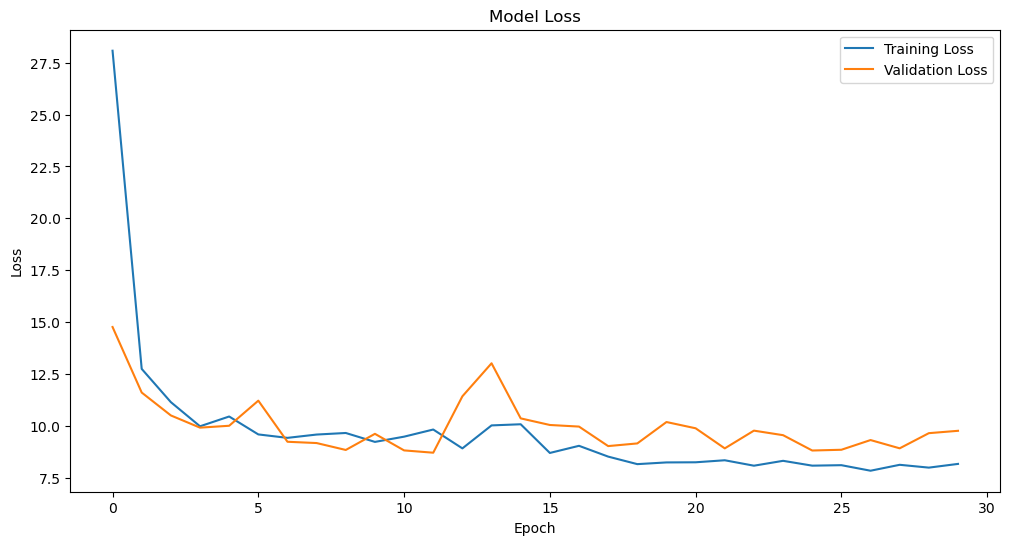

In [217]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [211]:
X_test_clean.shape

(343, 40)

In [219]:
import numpy as np
from sklearn.metrics import mean_squared_error
nn_predictions = nn_model.predict(X_test_clean)
score = np.sqrt(mean_squared_error(y_test_clean, nn_predictions))
score

11/11 [==============================] - 0s 2ms/step


23.763641531856287

In [237]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras

def model_builder(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=X_train_clean.shape[1]))

    hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])
    hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=2001, step=100)
    hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=2001, step=100)
    hp_layer_3 = hp.Int('layer_3', min_value=1, max_value=2001, step=100)
    hp_layer_4 = hp.Int('layer_4', min_value=1, max_value=2001, step=100)
    hp_layer_5 = hp.Int('layer_5', min_value=1, max_value=2001, step=100)
    hp_drop_1 = hp.Choice('drop_1', values=[0.0, 0.2, 0.4, 0.6, 0.8, 0.999999999])
    hp_drop_2 = hp.Choice('drop_2', values=[0.0, 0.2, 0.4, 0.6, 0.8, 0.999999999])
    hp_drop_3 = hp.Choice('drop_3', values=[0.0, 0.2, 0.4, 0.6, 0.8, 0.999999999])
    hp_drop_4 = hp.Choice('drop_4', values=[0.0, 0.2, 0.4, 0.6, 0.8, 0.999999999])
    hp_drop_5 = hp.Choice('drop_5', values=[0.0, 0.2, 0.4, 0.6, 0.8, 0.999999999])

    model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation))
    model.add(tf.keras.layers.Dropout(hp_drop_1))
    model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))
    model.add(tf.keras.layers.Dropout(hp_drop_2))
    model.add(tf.keras.layers.Dense(units=hp_layer_3, activation=hp_activation))
    model.add(tf.keras.layers.Dropout(hp_drop_3))
    model.add(tf.keras.layers.Dense(units=hp_layer_4, activation=hp_activation))
    model.add(tf.keras.layers.Dropout(hp_drop_4))
    model.add(tf.keras.layers.Dense(units=hp_layer_5, activation=hp_activation))
    model.add(tf.keras.layers.Dropout(hp_drop_5))
    model.add(tf.keras.layers.Dense(units=1))  # Output layer for regression

    model.compile(optimizer= 'adam',
                  loss= 'mean_squared_error',  # Use MSE for regression
                  #metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')] # RMSE metric
                  )  

    return model

tuner = kt.Hyperband(model_builder,
                     objective=kt.Objective('val_loss', 'min'),  # Optimize for RMSE
                     max_epochs=30,
                     factor=3,
                     directory='./dir',
                     project_name='x')

In [238]:
##Tune parameters
tuner.search(X_train_clean.to_numpy(), y_train_clean, 
             epochs = 50, validation_data = (X_val_clean, y_val_clean))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 90 Complete [00h 00m 16s]
val_loss: 4391.22607421875

Best val_loss So Far: 75.73936462402344
Total elapsed time: 00h 10m 33s


In [240]:
best_hps.values

{'activation': 'relu',
 'layer_1': 1301,
 'layer_2': 501,
 'layer_3': 1301,
 'layer_4': 801,
 'layer_5': 801,
 'drop_1': 0.4,
 'drop_2': 0.4,
 'drop_3': 0.0,
 'drop_4': 0.2,
 'drop_5': 0.0,
 'tuner/epochs': 30,
 'tuner/initial_epoch': 10,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0047'}

In [247]:
import tensorflow as tf
from tensorflow import keras
nn_model = keras.models.Sequential([
    tf.keras.Input(shape = X_train_clean.shape[1]),
    keras.layers.Dense(1301, activation = 'relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(501, activation = 'relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1301, activation = 'relu'),
    #keras.layers.Dropout(0.4),
    keras.layers.Dense(801, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(801, activation = 'relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])
def rmse(y_true, y_pred):
    # Cast y_true to float32 to match the type of y_pred
    y_true = tf.cast(y_true, tf.float32)
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

nn_model.compile(optimizer = 'adam', loss = rmse)

history = nn_model.fit(X_train_clean, y_train_clean, epochs = 100, validation_data = (X_val_clean, y_val_clean))

Epoch 1/100
33/33 [==============================] - 1s 18ms/step - loss: 34.4277 - val_loss: 16.2709
Epoch 2/100
33/33 [==============================] - 0s 13ms/step - loss: 16.4473 - val_loss: 16.7658
Epoch 3/100
33/33 [==============================] - 0s 13ms/step - loss: 12.5273 - val_loss: 11.0473
Epoch 4/100
33/33 [==============================] - 0s 15ms/step - loss: 10.8200 - val_loss: 11.6059
Epoch 5/100
33/33 [==============================] - 0s 11ms/step - loss: 11.6826 - val_loss: 10.9419
Epoch 6/100
33/33 [==============================] - 0s 11ms/step - loss: 11.6520 - val_loss: 10.0910
Epoch 7/100
33/33 [==============================] - 0s 12ms/step - loss: 10.6124 - val_loss: 11.4319
Epoch 8/100
33/33 [==============================] - 0s 13ms/step - loss: 10.8188 - val_loss: 13.5697
Epoch 9/100
33/33 [==============================] - 0s 12ms/step - loss: 11.7734 - val_loss: 10.5633
Epoch 10/100
33/33 [==============================] - 0s 13ms/step - loss: 9.7404 

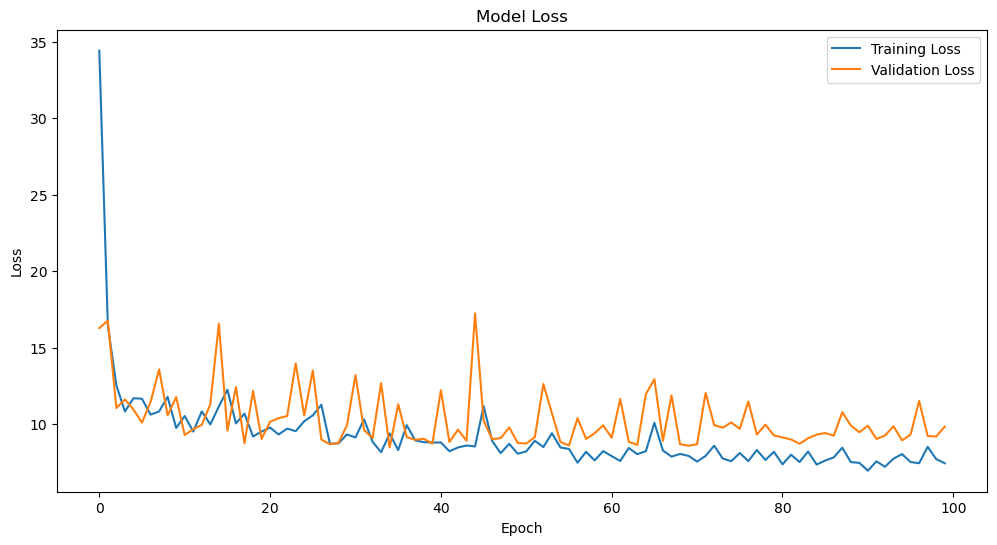

In [248]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [251]:
import numpy as np
from sklearn.metrics import mean_squared_error
nn_predictions = nn_model.predict(X_test_clean)
score = np.sqrt(mean_squared_error(y_test_clean, nn_predictions))
score

11/11 [==============================] - 0s 4ms/step


17.28245695600025

XGBoost + Scikit-Learn

In [290]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import ensemble
from xgboost import XGBRegressor
model_params = {
    'xgbRegressor': {
        'model': XGBRegressor(objective = 'reg:squarederror', eval_metric = 'rmse', seed = 42, 
                              booster = 'gbtree', grow_policy = 'depthwise', tree_method = 'auto',
                              reg_lambda = 4.5, reg_alpha = 6.5, max_bin = 275, max_delta_step = 10,
                                max_leaves = 10, refresh_leaf = 0, subsample = 1),
        'params': {
            #'booster': ['dart', 'gbtree', 'gblinear'],
            #'grow_policy': ['depthwise', 'lossguide'],
            #'tree_method': ['auto','approx'],
            #'learning_rate': [0, 0.01, 0.05, 0.1, 0.15],
            #'subsample': [0.6, 0.7, 0.8, 1], ###### DEFAULT: 1
            #'max_leaves': [0,5,10,15,20,25], ###### DEFAULT: 0
            #'max_bin': [200, 225, 250, 256, 275], ###### DEFAULT: 256
            #'max_delta_step': [0, 10,15, 20], ###Default is 0
            #'refresh_leaf': [0,1], ###### DEFAULT: 1
            #'reg_lambda': [3, 3.5, 4, 4.5, 5, 5.5, 6, 6.7, 7, 7.5, 8, 8.5, 9],
            #'reg_alpha': [3, 3.5, 4, 4.5, 5, 5.5, 6, 6.7, 7, 7.5, 8, 8.5, 9], 
            }
    },
    'random_forrest': {
        'model': ensemble.RandomForestRegressor(criterion = 'squared_error', max_features = 'log2',
                                                max_depth=  13, n_estimators= 17, min_samples_leaf = 2,
                                                min_samples_split = 5),
        'params': {
            #'n_estimators': [13,14, 15, 16,17],
            #'max_depth': [5,6,7,8,9,10,11,12,13,14,15], ##############RETRAIN to make between 5-15#############
            #'min_samples_split': [3,4,5,6,7,8],
            #'min_samples_leaf': [2,3,4],
            #'max_features': ['sqrt', 'log2']
        }
    },
}

def get_score_metrics(score_array):
    rmse_array = np.sqrt(-1 * score_array)
    avg = rmse_array.mean().round(decimals = 2)
    std = rmse_array.std().round(decimals = 2)
    print(f'Average Score:  {avg}')
    print(f'Std: {std}')

XGB

In [267]:
boost_map = model_params['xgbRegressor']
boost_clf = GridSearchCV(boost_map['model'], boost_map['params'], scoring = 'neg_mean_squared_error', cv = 5, return_train_score=True)
boost_clf.fit(X_train_clean.to_numpy(), y_train_clean)

print('-------------')
print(boost_clf.best_params_)
print('--------------')
print(boost_clf.best_score_)
print(boost_clf.best_estimator_)

-------------
{}
--------------
-64.28414924829794
XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy='depthwise', importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=275,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=10,
             max_depth=None, max_leaves=10, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)


In [268]:
xgb_model = XGBRegressor(objective = 'reg:squarederror', eval_metric = 'rmse', seed = 42, 
                              booster = 'gbtree', grow_policy = 'depthwise', tree_method = 'auto',
                              reg_lambda = 4.5, reg_alpha = 6.5, max_bin = 275, max_delta_step = 10,
                              max_leaves = 10, refresh_leaf = 0, subsample = 1)
xgb_cv_score = cross_val_score(xgb_model, X_train_clean.to_numpy(), y_train_clean,
                                scoring = 'neg_mean_squared_error', cv = 5)
get_score_metrics(xgb_cv_score)


Average Score:  8.0
Std: 0.47


In [273]:
xgb_model = XGBRegressor(objective = 'reg:squarederror', eval_metric = 'rmse', seed = 42, 
                              booster = 'gbtree', grow_policy = 'depthwise', tree_method = 'auto',
                              reg_lambda = 4.5, reg_alpha = 6.5, max_bin = 275, max_delta_step = 10,
                              max_leaves = 10, refresh_leaf = 0, subsample = 1)

xgb_model.fit(X_train_clean.to_numpy(), y_train_clean)

y_val_pred = xgb_model.predict(X_val_clean.to_numpy())
val_score = np.sqrt(mean_squared_error(y_val_clean, y_val_pred))

y_test_pred = xgb_model.predict(X_test_clean.to_numpy())
test_score = np.sqrt(mean_squared_error(y_test_clean, y_test_pred))

print(val_score)
print(test_score)

8.693171520276241
8.803865781909929


Random Forest

In [289]:
rf_map = model_params['random_forrest']
rf_clf = GridSearchCV(rf_map['model'], rf_map['params'], scoring = 'neg_mean_squared_error', cv = 5, return_train_score=True)
rf_clf.fit(X_train_clean.to_numpy(), y_train_clean.to_numpy().ravel())

print('-------------')
print(rf_clf.best_params_)
print('--------------')
print(rf_clf.best_score_)
print(rf_clf.best_estimator_)

-------------
{'min_samples_leaf': 2, 'min_samples_split': 5}
--------------
-73.32377337825639
RandomForestRegressor(max_depth=13, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=17)


In [292]:
rf_model = ensemble.RandomForestRegressor(criterion = 'squared_error', max_features = 'log2',
                                                max_depth=  13, n_estimators= 17, min_samples_leaf = 2,
                                                min_samples_split = 5)

rf_model.fit(X_train_clean.to_numpy(), y_train_clean.to_numpy().ravel())

y_val_pred = rf_model.predict(X_val_clean.to_numpy())
val_score = np.sqrt(mean_squared_error(y_val_clean, y_val_pred))

y_test_pred = rf_model.predict(X_test_clean.to_numpy())
test_score = np.sqrt(mean_squared_error(y_test_clean, y_test_pred))

print(val_score)
print(test_score)

8.812624318794423
8.401951173999999
